In [100]:
from bs4 import BeautifulSoup
from urllib.request import Request,urlopen

In [101]:
# ticker = "AAPL"
finwiz1 = "https://finviz.com/quote.ashx?t="
finwiz2 = "&p=d"
# tickers = ["AAPL","AMZN","AMD","META","AAPL"]

In [102]:
ticker = input("Enter Ticker :")
# ticker = input()

We create a news table dictionary to store the news headlines in HTML Table

In [103]:
news_tables = {}

Request specifies and sends the url to finwiz.
We also specify a header -> it allows us to access the data.
Headers parameter has a mutable mapping -> {a:b}, where we specify that we are user and using the request for my-app.
Response gives us the HTTP object

In [104]:
# for ticker in tickers:
url = finwiz1 + ticker + finwiz2
req = Request(url=url, headers={"user-agent": "my-app"})
response = urlopen(req)
print(response)
html = BeautifulSoup(response, "html")
news_table = html.find(id="news-table")
news_tables[ticker] = news_table
# what this does is -> in the dictionary assign all the headlines to ticker.
# break


In [105]:
print(html)

<!DOCTYPE html>

<html class="dark" lang="en">
<head>
<title>FINVIZ.com - Stock Screener</title>
<meta charset="utf-8"/><meta content="width=1024" name="viewport"/><meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
<meta content="3600" http-equiv="Refresh"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-900.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/inter-latin.woff2" rel="preload"/>
<script>
                window.notificationsArray = [];
                window.renderScriptNotLoaded = function () {};
                window.handleScriptNotLoaded = function (element) {
                    window.notificationsArray.push(element);
                    window.sentryDisabled = true;
                 

In [106]:
print(news_tables)

{'': None}


In [107]:
ticker_data = news_tables[ticker]
ticker_row = ticker_data.findAll("tr")
ticker_row


AttributeError: 'NoneType' object has no attribute 'findAll'

In [ ]:
for index,row in enumerate(ticker_row):
    title = row.a.text
    timestamp = row.td.text
    print(timestamp + "  :  " + title)


            Jul-01-23 10:00AM
          :  These 4 Measures Indicate That Apple (NASDAQ:AAPL) Is Using Debt Reasonably Well

            09:27AM
          :  Goldman Mulls Exit of Apple Partnership in Further Retreat From Consumer Business

            08:32AM
          :  S&P 500 Rallies Back To Highs, But Watch For This; Tesla Deliveries Due

            07:15AM
          :  Does Meta Have a Chance Against Apple in VR?

            06:45AM
          :  Unveiling the Dark Side of Apple's Walled Garden

            06:45AM
          :  Is Apple the Best Warren Buffett Stock to Buy Right Now?

            Jun-30-23 06:33PM
          :  Weekly Roundup

            05:18PM
          :  These Are The Best Dow Jones Stocks Of 2023 So Far

            05:11PM
          :  S&P 500 Rallies Back To Highs As Apple, Nvidia Lead, But Watch For This; Tesla Deliveries Due

            05:00PM
          :  US STOCKS-Wall St rallies; Nasdaq hits 40-yr milestone, Apple scales $3 trillion

            

The Goal is create a list of lists which contains ticker, timestamp and titles.

In [ ]:
parsed_data = []

We are Transforming data into a 2d list/array which contains date,time,ticker, title.\
\
For 2 variables passed into 1st for loop news_tables.items() returns a set containing ticker and news.\
In 2nd loop for each row in news_table's tr tag, we assign title,date_data.\
\
At last we append the parsed_data list by adding ticker,date,time title columns in the rows of parsed data.\
Now each row contains each headline with its ticker and date/time.

In [ ]:
for ticker, news_table in news_tables.items():
    for row in news_table.findAll("tr"):
        
        # etract title from anchor tag
        title = row.a.text
        # extracts dates from table cell data
        date_data = row.td.text
        #  strips the string of leading and trailing whitespaces
        date_data = date_data.strip()
        print("date data:",date_data)
        # splitting return the date_data into to parts date and time.
        date_data = date_data.split(" ")
        
        print("date data - changed:",date_data)
        print("length date_data:",len(date_data))
        
        if len(date_data)==1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        print("date=",date)
        print("time=",time,"\n")
        parsed_data.append([ticker,date,time,title])
                
        

date data: Jul-01-23 10:00AM
date data - changed: ['Jul-01-23', '10:00AM']
length date_data: 2
date= Jul-01-23
time= 10:00AM 

date data: 09:27AM
date data - changed: ['09:27AM']
length date_data: 1
date= Jul-01-23
time= 09:27AM 

date data: 08:32AM
date data - changed: ['08:32AM']
length date_data: 1
date= Jul-01-23
time= 08:32AM 

date data: 07:15AM
date data - changed: ['07:15AM']
length date_data: 1
date= Jul-01-23
time= 07:15AM 

date data: 06:45AM
date data - changed: ['06:45AM']
length date_data: 1
date= Jul-01-23
time= 06:45AM 

date data: 06:45AM
date data - changed: ['06:45AM']
length date_data: 1
date= Jul-01-23
time= 06:45AM 

date data: Jun-30-23 06:33PM
date data - changed: ['Jun-30-23', '06:33PM']
length date_data: 2
date= Jun-30-23
time= 06:33PM 

date data: 05:18PM
date data - changed: ['05:18PM']
length date_data: 1
date= Jun-30-23
time= 05:18PM 

date data: 05:11PM
date data - changed: ['05:11PM']
length date_data: 1
date= Jun-30-23
time= 05:11PM 

date data: 05:00PM

In [ ]:
print(parsed_data)

[['AAPL', 'Jul-01-23', '10:00AM', 'These 4 Measures Indicate That Apple (NASDAQ:AAPL) Is Using Debt Reasonably Well'], ['AAPL', 'Jul-01-23', '09:27AM', 'Goldman Mulls Exit of Apple Partnership in Further Retreat From Consumer Business'], ['AAPL', 'Jul-01-23', '08:32AM', 'S&P 500 Rallies Back To Highs, But Watch For This; Tesla Deliveries Due'], ['AAPL', 'Jul-01-23', '07:15AM', 'Does Meta Have a Chance Against Apple in VR?'], ['AAPL', 'Jul-01-23', '06:45AM', "Unveiling the Dark Side of Apple's Walled Garden"], ['AAPL', 'Jul-01-23', '06:45AM', 'Is Apple the Best Warren Buffett Stock to Buy Right Now?'], ['AAPL', 'Jun-30-23', '06:33PM', 'Weekly Roundup'], ['AAPL', 'Jun-30-23', '05:18PM', 'These Are The Best Dow Jones Stocks Of 2023 So Far'], ['AAPL', 'Jun-30-23', '05:11PM', 'S&P 500 Rallies Back To Highs As Apple, Nvidia Lead, But Watch For This; Tesla Deliveries Due'], ['AAPL', 'Jun-30-23', '05:00PM', 'US STOCKS-Wall St rallies; Nasdaq hits 40-yr milestone, Apple scales $3 trillion'], ['

In [ ]:
import pandas as pd
df = pd.DataFrame(parsed_data,columns=["Ticker","Date","Time","Title"])
df

,Ticker,Date,Time,Title
0,AAPL,Jul-01-23,10:00AM,These 4 Measures Indicate That Apple (NASDAQ:A...
1,AAPL,Jul-01-23,09:27AM,Goldman Mulls Exit of Apple Partnership in Fur...
2,AAPL,Jul-01-23,08:32AM,"S&P 500 Rallies Back To Highs, But Watch For T..."
3,AAPL,Jul-01-23,07:15AM,Does Meta Have a Chance Against Apple in VR?
4,AAPL,Jul-01-23,06:45AM,Unveiling the Dark Side of Apple's Walled Garden
...,...,...,...,...
95,AAPL,Jun-28-23,02:18PM,Bitcoin-Friendly App Damus Avoids Apple Deplat...
96,AAPL,Jun-28-23,02:00PM,"Stocks to Watch Wednesday: Nvidia, General Mil..."
97,AAPL,Jun-28-23,02:00PM,Chart of the Day: 'Stunning' Apple Continues t...
98,AAPL,Jun-28-23,01:09PM,"Apple's stock hits record, on cusp of $3 trill..."


In [ ]:
df['Date']

0     Jul-01-23
1     Jul-01-23
2     Jul-01-23
3     Jul-01-23
4     Jul-01-23
        ...    
95    Jun-28-23
96    Jun-28-23
97    Jun-28-23
98    Jun-28-23
99    Jun-28-23
Name: Date, Length: 100, dtype: object

We import NLTK. It is a package which parses a text and analysis its sentiment.\
\
Polarity scores is a method/function which assigns negative/positive/nuetral scores to input text.

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
# print("doneeee")

In [ ]:

# example of polarity scores classification.
print(vader.polarity_scores("I think apple is bad company. I think they will do poorly this quarter"))

{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.5423}


Creating a lambda funct which return polarity score of a given title

In [ ]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['Title'].apply(f)
df

,Ticker,Date,Time,Title,compound
0,AAPL,2023-07-01,10:00AM,These 4 Measures Indicate That Apple (NASDAQ:A...,-0.1027
1,AAPL,2023-07-01,09:27AM,Goldman Mulls Exit of Apple Partnership in Fur...,0.2023
2,AAPL,2023-07-01,08:32AM,"S&P 500 Rallies Back To Highs, But Watch For T...",0.0000
3,AAPL,2023-07-01,07:15AM,Does Meta Have a Chance Against Apple in VR?,0.2500
4,AAPL,2023-07-01,06:45AM,Unveiling the Dark Side of Apple's Walled Garden,0.0000
...,...,...,...,...,...
95,AAPL,2023-06-28,02:18PM,Bitcoin-Friendly App Damus Avoids Apple Deplat...,-0.5106
96,AAPL,2023-06-28,02:00PM,"Stocks to Watch Wednesday: Nvidia, General Mil...",0.0000
97,AAPL,2023-06-28,02:00PM,Chart of the Day: 'Stunning' Apple Continues t...,0.4404
98,AAPL,2023-06-28,01:09PM,"Apple's stock hits record, on cusp of $3 trill...",0.3400


In [108]:
df['Date'] = pd.to_datetime(df.Date,format="%b-%d-%y").dt.date
df

,Ticker,Date,Time,Title,compound
0,AAPL,2023-07-01,10:00AM,These 4 Measures Indicate That Apple (NASDAQ:A...,-0.1027
1,AAPL,2023-07-01,09:27AM,Goldman Mulls Exit of Apple Partnership in Fur...,0.2023
2,AAPL,2023-07-01,08:32AM,"S&P 500 Rallies Back To Highs, But Watch For T...",0.0000
3,AAPL,2023-07-01,07:15AM,Does Meta Have a Chance Against Apple in VR?,0.2500
4,AAPL,2023-07-01,06:45AM,Unveiling the Dark Side of Apple's Walled Garden,0.0000
...,...,...,...,...,...
95,AAPL,2023-06-28,02:18PM,Bitcoin-Friendly App Damus Avoids Apple Deplat...,-0.5106
96,AAPL,2023-06-28,02:00PM,"Stocks to Watch Wednesday: Nvidia, General Mil...",0.0000
97,AAPL,2023-06-28,02:00PM,Chart of the Day: 'Stunning' Apple Continues t...,0.4404
98,AAPL,2023-06-28,01:09PM,"Apple's stock hits record, on cusp of $3 trill...",0.3400


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# taking compounded score of a day.
mean_df = df.groupby(['Ticker','Date']).compound.mean()
mean_df.head()

Ticker  Date      
AAPL    2023-06-28    0.161185
        2023-06-29   -0.003592
        2023-06-30    0.133811
        2023-07-01    0.164417
Name: compound, dtype: float64

In [ ]:
mean_df = mean_df.unstack()
mean_df

Date,2023-06-28,2023-06-29,2023-06-30,2023-07-01
Ticker,,,,
AAPL,0.161185,-0.003592,0.133811,0.164417


In [ ]:
# xs is cross section function
# mean_df = mean_df.xs("compound",axis="columns")
mean_df

Ticker  Date      
AAPL    2023-06-28    0.161185
        2023-06-29   -0.003592
        2023-06-30    0.133811
        2023-07-01    0.164417
Name: compound, dtype: float64

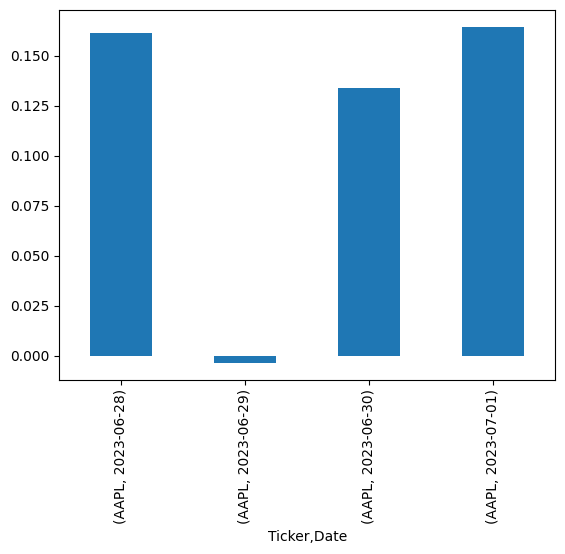

In [ ]:
mean_df.plot(kind="bar")
plt.show()